# Monte Carlo

Carolina Herrera S.

In [0]:
import numpy as np
import numpy.random as rnd
from scipy.integrate import quad, nquad
import matplotlib.pyplot as plt

## Integración con Monte Carlo

* Escribir un integrador de Monte Carlo para 1 dim y 3 dim.
* Usar scipy.integrate.quad para comparar.
* 1 dim: $f(x) = x^{-3}$, $g(x) = x^{-1/2}$, $x \in [1, 10]$.
* 3 dim: $h(x, y, z) = \frac{1}{x} + y + z^2$, $x\in [1, 10]$, $y \in [0, 2]$, $z\in [0, 2]$.
* $N = 100, 1000, 10000$
* Graficar $E$ vs $N$ y $S^2$ vs $N$

https://arxiv.org/pdf/hep-ph/0006269.pdf






In [0]:
def func1(x):
  return np.power(x, -3)

def func2(x):
  return np.power(x, -1/2)

def func3(x, y, z):
  return 1./x + y + np.power(z, 2)


### 1D, $f(x)$

In [0]:
# Integración con Monte Carlo para una dimensión
def monte_carlo_1D(func, a, b, N):
  x_sample = rnd.uniform(a, b, size=(1, N))
  y_mc = func(x_sample)
  
  E = (b-a)/N*y_mc.sum()
  S2 = (b-a)/N*(y_mc**2).sum() - E**2
  #S2 = (b-a)/(N-1)*((y_mc - E)**2).sum()

  return E, S2

# Integración con Monte Carlo estratificada para una dimensión
def monte_carlo_estrat_1D(func, a, b, N, k):
  n_reg = (b-a)/k
  E = 0

  for i in range(k):
    est, err = monte_carlo_1D(func, a+i*n_reg, b+i*n_reg, N[i])
    E += est

  return E

### Integrador de Monte Carlo

In [0]:
N_list = [100, 1000, 10000] # Número de puntos
a = 1 # Inicio del intervalo de integración
b = 10 # Final del intervalo

E_list = []
S2_list = []
diff_list = []

I, err = quad(func1, a, b)

for N in N_list:
  integral_mc, var_mc = monte_carlo_1D(func1, a, b, N)

  E_list.append(integral_mc)
  S2_list.append(var_mc)
  diff_list.append(np.mean(np.abs(integral_mc-I)))


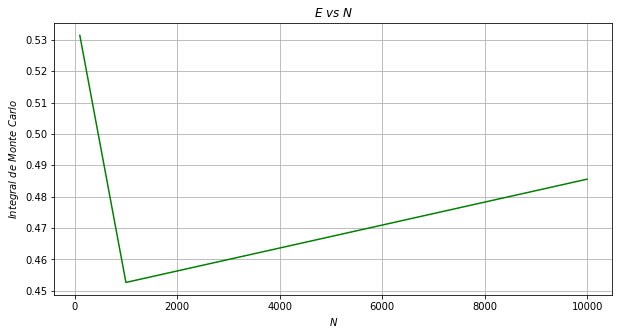

In [234]:
plt.figure(figsize=(10, 5))
plt.plot(N_list, E_list, 'g')
plt.xlabel(r'$N$')
plt.ylabel(r'$Integral\ de\ Monte\ Carlo$')
plt.title(r'$E\ vs\ N$')
plt.grid()

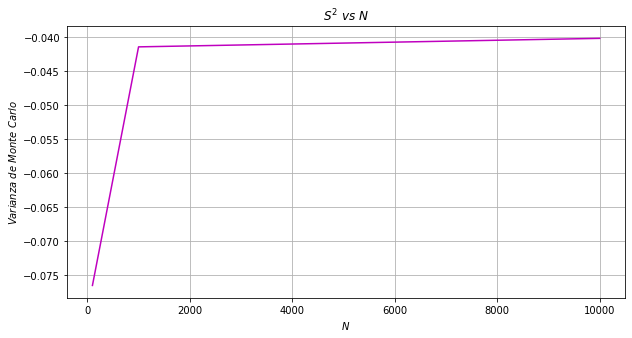

In [235]:
plt.figure(figsize=(10, 5))
plt.plot(N_list, S2_list, 'm')
plt.xlabel(r'$N$')
plt.ylabel(r'$Varianza\ de\ Monte\ Carlo$')
plt.title(r'$S^2 \ vs \ N$')
plt.grid()

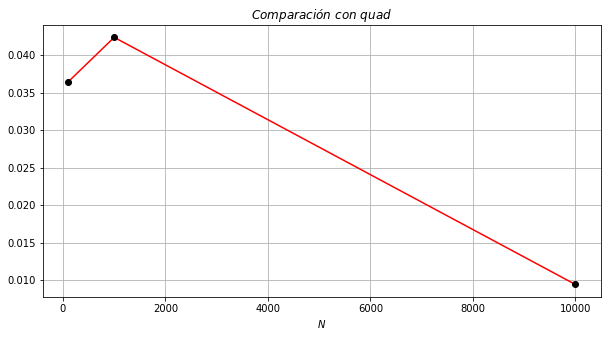

In [236]:
plt.figure(figsize=(10, 5))
plt.plot(N_list, diff_list, 'r')
plt.plot(N_list, diff_list, 'ko')

plt.xlabel(r'$N$')
plt.title(r'$Comparación\ con\ quad$')
plt.grid()

### Monte Carlo estratificado

In [238]:
N_list = [20000, 10000, 5000]
k = 3 # Número de divisiones
a = 1
b = 10 

integral_estrat = monte_carlo_estrat_1D(func1, a, b, N_list, k)

print('Integral con Monte Carlo estratificado: %.2f'%integral_estrat)
print('Integral con quad: %.2f'%I)

Integral con Monte Carlo estratificado: 0.53
Integral con quad: 0.49


### 1D, $g(x)$

Esta función no es de cuadrado integrable y por tanto el cálculo de $S^2$ no es válido.

In [0]:
N_list = [100, 1000, 10000] # Size
a = 1 # Left
b = 10 # Right

E_list = []
S2_list = []
diff_list = []

I2, err = quad(func2, a, b)

for N in N_list:
  integral_mc, var_mc = monte_carlo_1D(func2, a, b, N)

  E_list.append(integral_mc)
  S2_list.append(var_mc)
  diff_list.append(np.mean(np.abs(integral_mc-I2)))

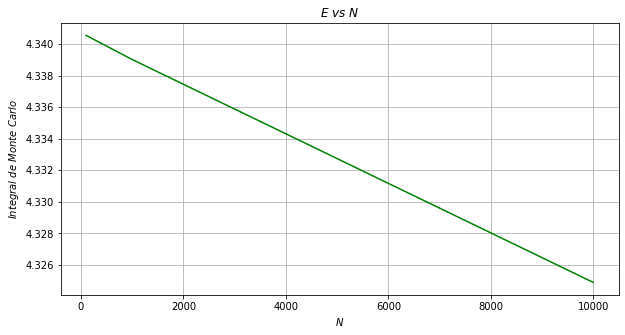

In [246]:
plt.figure(figsize=(10, 5))
plt.plot(N_list, E_list, 'g')
plt.xlabel(r'$N$')
plt.ylabel(r'$Integral\ de\ Monte\ Carlo$')
plt.title(r'$E\ vs\ N$')
plt.grid()

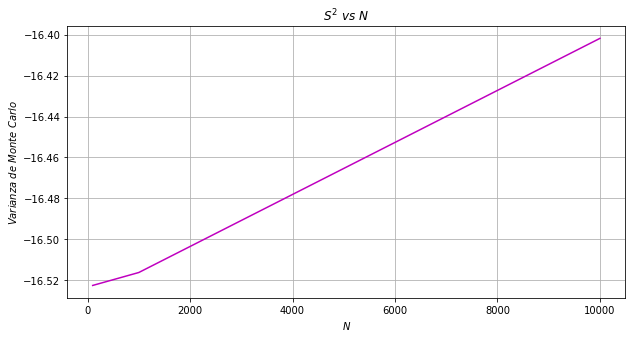

In [247]:
plt.figure(figsize=(10, 5))
plt.plot(N_list, S2_list, 'm')
plt.xlabel(r'$N$')
plt.ylabel(r'$Varianza\ de\ Monte\ Carlo$')
plt.title(r'$S^2 \ vs \ N$')
plt.grid()

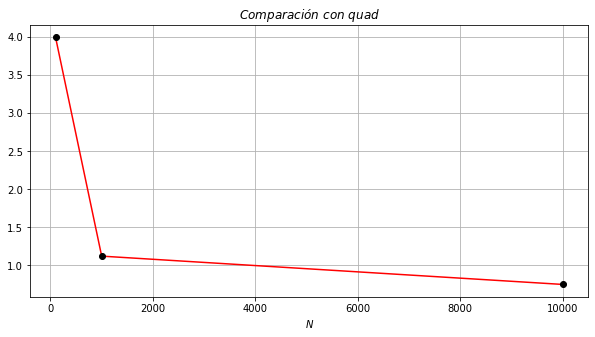

In [248]:
plt.figure(figsize=(10, 5))
plt.plot(N_list, error_list, 'r')
plt.plot(N_list, error_list, 'ko')

plt.xlabel(r'$N$')
plt.title(r'$Comparación\ con\ quad$')
plt.grid()

### Monte Carlo estratificado

In [252]:
N_list = [10000, 5000, 10000]
k = 3 # Número de divisiones
a = 1
b = 10 

integral_estrat2 = monte_carlo_estrat_1D(func2, a, b, N_list, k)

print('Integral con Monte Carlo estratificado: %.2f'%integral_estrat2)
print('Integral con quad: %.2f'%I2)

Integral con Monte Carlo estratificado: 10.24
Integral con quad: 4.32


### 3D, $h(x, y, z)$

In [0]:
# Integración con Monte Carlo para tres dimensiones
def monte_carlo_3D(func, a, b, N):
  x_sample = rnd.uniform(a[0], b[0], size=(1, N))
  y_sample = rnd.uniform(a[1], b[1], size=(1, N))
  z_sample = rnd.uniform(a[2], b[2], size=(1, N))

  y_mc = func(x_sample, y_sample, z_sample)
  
  E = np.prod(b-a)/N*y_mc.sum()
  S2 = np.prod(b-a)/N*(y_mc**2).sum() - E**2

  return E, S2

In [0]:
N_list = [100, 1000, 10000]
a = np.array([1, 0, 0])
b = np.array([10, 2, 2])

E_list = []
S2_list = []
error_list = []

I, err = nquad(func3, np.column_stack((a, b)))

for N in N_list:
  integral_mc, var_mc = monte_carlo_3D(func3, a, b, N)

  E_list.append(integral_mc)
  S2_list.append(var_mc)
  error_list.append(np.mean(np.abs(integral_mc-I)))

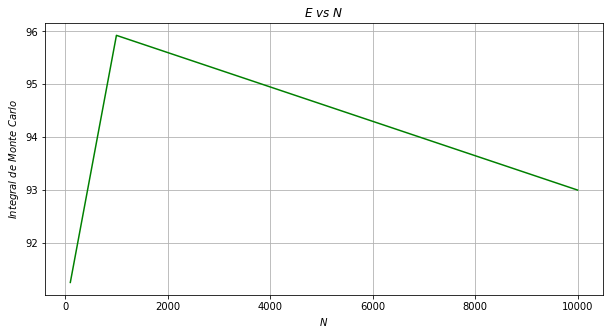

In [255]:
plt.figure(figsize=(10, 5))
plt.plot(N_list, E_list, 'g')
plt.xlabel(r'$N$')
plt.ylabel(r'$Integral\ de\ Monte\ Carlo$')
plt.title(r'$E\ vs\ N$')
plt.grid()

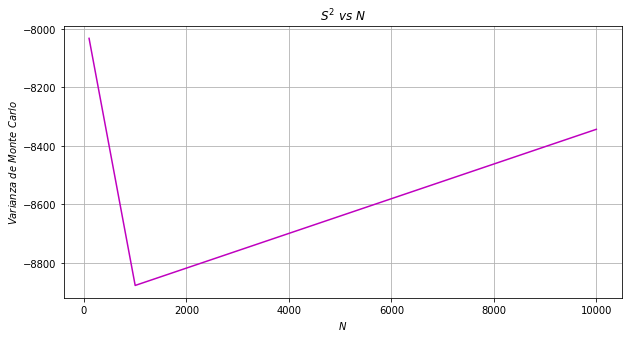

In [256]:
plt.figure(figsize=(10, 5))
plt.plot(N_list, S2_list, 'm')
plt.xlabel(r'$N$')
plt.ylabel(r'$Varianza\ de\ Monte\ Carlo$')
plt.title(r'$S^2 \ vs \ N$')
plt.grid()

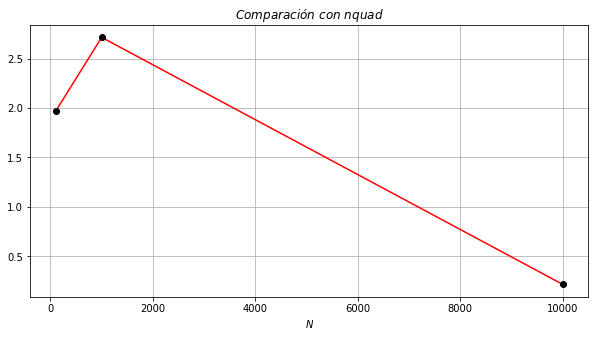

In [257]:
plt.figure(figsize=(10, 5))
plt.plot(N_list, error_list, 'r')
plt.plot(N_list, error_list, 'ko')

plt.xlabel(r'$N$')
plt.title(r'$Comparación\ con\ nquad$')
plt.grid()

## Algoritmo de Metrópolis

**Algoritmo de Metrópolis**

1. Generar aleatoriamente $\phi_0$.
2. Generar aleatoriamente $\phi '$.
3. Calcular $\Delta S = -ln(\frac{P(\phi ')}{P(\phi_0)})$.
4. Si $\Delta S < 0$, $\phi_1 = \phi '$.
5. Si $\Delta S > 0$, acepto $\phi '$ con una probabilidad $\frac{P(\phi ')}{P(\phi_0)}$, de lo contrario no se acepta $\phi '$.
6. Volver al paso 2.

$P(\theta) = \frac{1}{\sigma \sqrt{2 \pi}}e^{\frac{-(\theta - \mu)^2}{2 \sigma^2}}$, $\mu = 0; \sigma = 0.1$

Generar 1000 eventos y graficar $\phi$, $[-\pi, \pi]$.

In [0]:
def prob(x):
  mu = 0.
  sig = 0.1
  return (1/(sig*(2*np.pi)**(1/2)))*np.exp(-(x-mu)**2/(2*sig**2))

In [0]:
N = 1000

phi0 = 2*np.pi*rnd.random()-np.pi
phi = [phi0]

while len(phi) < N:
  phip = 2*np.pi*rnd.random()-np.pi
  deltaS = -np.log(prob(phip)/prob(phi[-1]))

  if deltaS < 0:
    phi.append(phip)

  else:
    x = rnd.random()
    if x < prob(phip)/prob(phi[-1]):
      phi.append(phip)


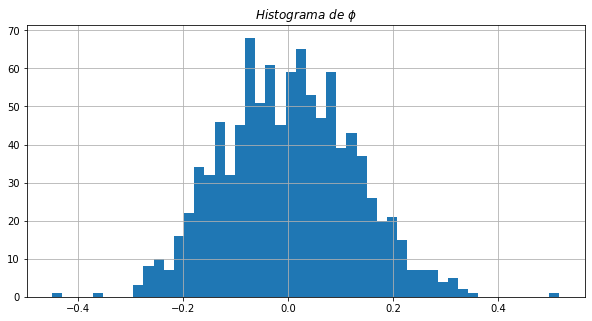

In [0]:
plt.figure(figsize=(10, 5))
plt.hist(phi, bins=50);
plt.title(r'$Histograma\ de\ \phi$')
plt.grid()